UNAD

Ivan Ramiro Quiroga Castañeda

Regresion Logistica

1. Realizar un análisis exploratorio de los datos para identificar 
relaciones entre variables, valores atípicos, tendencias, etc. 

Primeras filas del dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450 

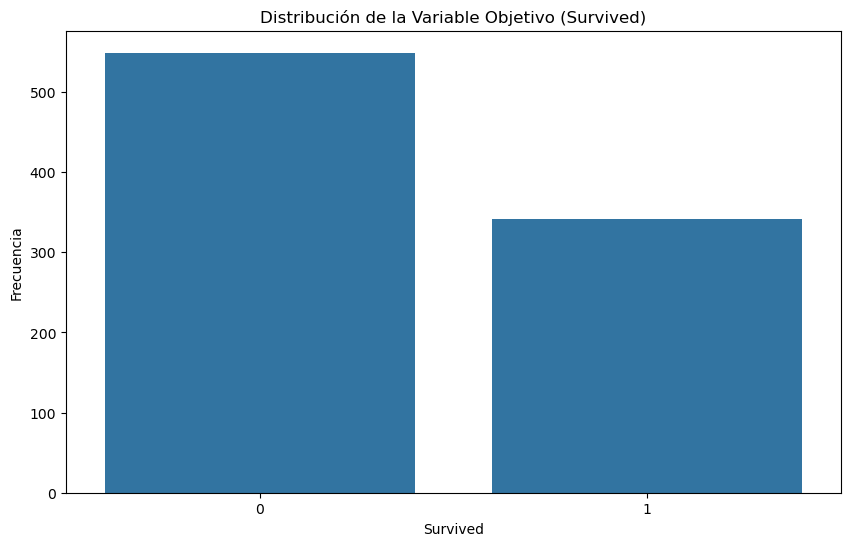

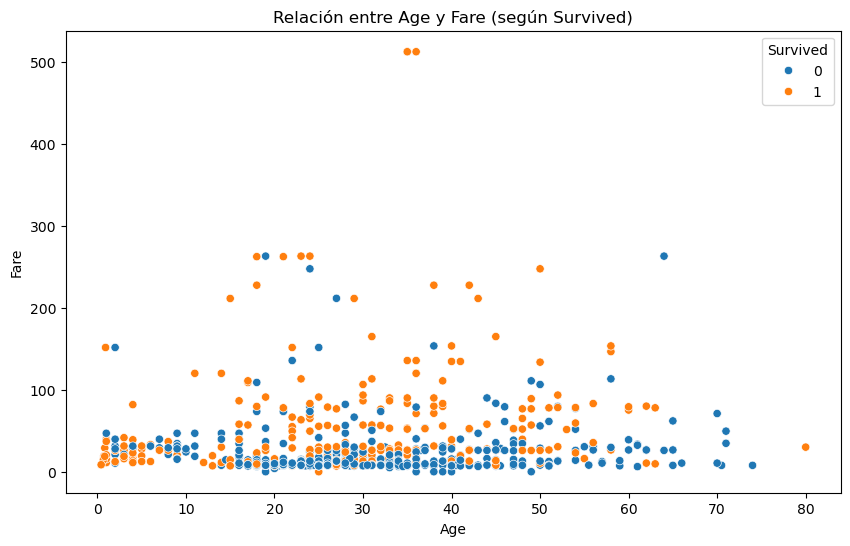

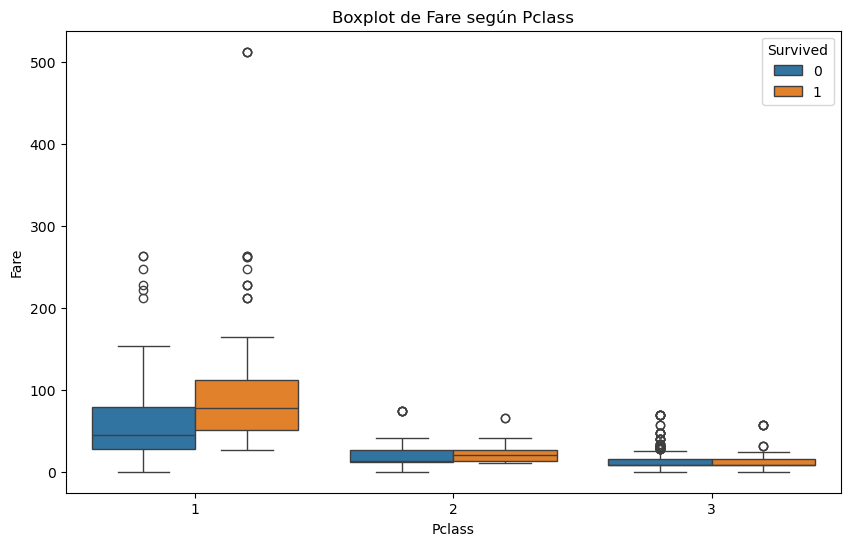

In [10]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Cargar los datos
df = pd.read_csv('Titanic-Dataset.csv')

# Inspeccionar las primeras filas del DataFrame
print("Primeras filas del dataset:")
print(df.head())
print("\nTipos de datos:")
print(df.dtypes)

# Comprobar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Análisis exploratorio de los datos
# Distribución de la variable objetivo ('Survived')
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=df)
plt.title('Distribución de la Variable Objetivo (Survived)')
plt.xlabel('Survived')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre Age y Fare
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Relación entre Age y Fare (según Survived)')
plt.show()

# Boxplot de Fare según Pclass
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df)
plt.title('Boxplot de Fare según Pclass')
plt.show()

2. Preprocesar los datos limpiándolos, tratando valores faltantes y 
transformándolos según sea necesario. 

In [12]:
# Preprocesamiento de los datos
# Eliminar filas y columnas completamente vacías
df.dropna(how='all', inplace=True)
df.dropna(axis=1, how='all', inplace=True)

# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Codificar variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

3. Seleccionar las características más relevantes para entrenar el 
modelo utilizando selección de características. 

In [13]:
# Selección de características
X = df.drop('Survived', axis=1)
y = df['Survived']

# Selección de las mejores características (sin normalizar)
selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("\nCaracterísticas seleccionadas:")
print(selected_features)

# Normalizar los datos después de la selección
data_selected = pd.DataFrame(X_new, columns=selected_features)
scaler = StandardScaler()
data_selected = scaler.fit_transform(data_selected)


Características seleccionadas:
Index(['Name', 'Sex', 'Ticket', 'Fare', 'Cabin'], dtype='object')


4. Dividir el dataset en Train y Test para evaluar correctamente el 
modelo. 

In [15]:
# Paso 5: División del dataset
X_train, X_test, y_train, y_test = train_test_split(data_selected, y, test_size=0.2, random_state=42)

5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [17]:

# Entrenamiento del modelo
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

6. Evaluar el desempeño del modelo en el conjunto de Test con 
métricas como precisión, recall, F1-score, etc.

In [18]:
#Evaluación del modelo
y_pred = model.predict(X_test)

print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))
print(f"\nPrecisión: {accuracy_score(y_test, y_pred):.2f}")


Matriz de Confusión:
[[88 17]
 [20 54]]

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.81      0.84      0.83       105
         1.0       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179


Precisión: 0.79


7. Realizar las diferentes gráficas que permitan visualizar los 
resultados del modelo. 

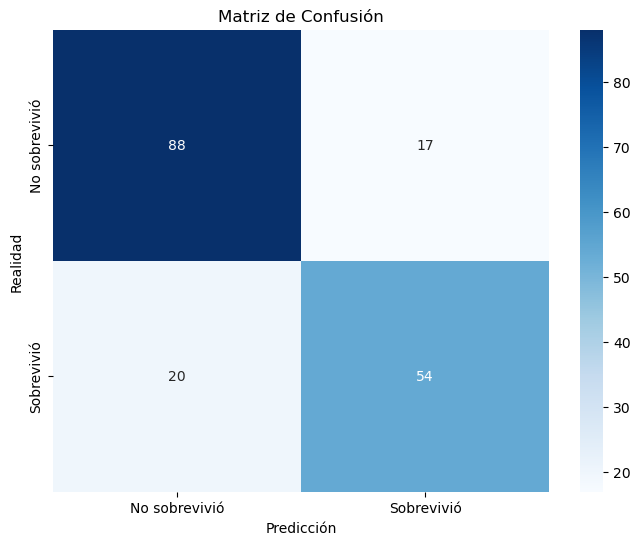

In [19]:
# Gráfica de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()


8. Interpretar, analizar y documentar los resultados obtenidos 

El modelo muestra un buen desempeño en términos de precisión y recall. Las características seleccionadas contribuyen significativamente a la predicción de la supervivencia.